# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Muhammad Arif Rahman
- **Email:** muh.arif2880@gmail.com
- **ID Dicoding:** ariffrmn

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?
- Bagaimana pola penggunaan sepeda berubah berdasarkan hari dalam seminggu
- Bagaimana pola penggunaan sepeda berubah berdasarkan jam dalam sehari

## Import Semua Packages/Library yang Digunakan

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [94]:
day_df = pd.read_csv("https://raw.githubusercontent.com/arif12ahman/bike-sharing-dashboard/refs/heads/main/data/day.csv")
# Menampilkan beberapa baris pertama untuk melihat data day_df
print("Preview day_df:")
day_df.head()

Preview day_df:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [95]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/arif12ahman/bike-sharing-dashboard/refs/heads/main/data/hour.csv")
# Menampilkan beberapa baris pertama untuk melihat data hour_df
print("Preview hour_df:")
hour_df.head()

Preview hour_df:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pada tahap ini, seluruh data yang tersedia telah diubah menjadi dataframe
- Menampilkan 5 baris teratas pada tiap dataframe menggunakan .head()

### Assessing Data

In [96]:
# Mengecek informasi umum tentang dataset day_df
print("Info tentang day_df:")
day_df.info()

Info tentang day_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [97]:
# Mengecek informasi umum tentang dataset hour_df
print("Info tentang hour_df:")
hour_df.info()

Info tentang hour_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [98]:
# Memeriksa apakah ada value yang hilang di dataset day_df
print("\nMissing value di day_df:")
print(day_df.isnull().sum())



Missing value di day_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [99]:
# Memeriksa apakah ada value yang hilang di dataset hour_df
print("Missing value di hour_df:")
print(hour_df.isnull().sum())

Missing value di hour_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [100]:
# Memeriksa apakah ada duplikat
print("Data duplikat di day_df:", day_df.duplicated().sum())

print("Data duplikat di hour_df:", hour_df.duplicated().sum())

Data duplikat di day_df: 0
Data duplikat di hour_df: 0


**Insight:**
- Pada kolom dteday pada tiap dataframe masih bertipe data object. Seharusnya dteday bertipe daya datetime
- Tidak adak missing value dan data duplikat pada tiap dataframe

### Cleaning Data

In [101]:
# Mengubah kolom 'dteday' menjadi tipe data datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [102]:
# Mengubah value pada kolom 'weathersit' dengan kondisi cuaca singkat yang lebih mudah dipahami
weather_dict = {
    1: "Clear",
    2: "Mist",
    3: "Light Rain/Snow",
    4: "Heavy Rain/Snow"
}

day_df['weathersit'] = day_df['weathersit'].map(weather_dict)
hour_df['weathersit'] = hour_df['weathersit'].map(weather_dict)

In [103]:
# Mengubah value pada kolom 'weekday' dengan nama hari
weekday_dict = {
    0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday",
    4: "Friday", 5: "Saturday", 6: "Sunday"
}

day_df['weekday'] = day_df['weekday'].map(weekday_dict)
hour_df['weekday'] = hour_df['weekday'].map(weekday_dict)

In [104]:
# Menyaring kolom yang relevan untuk pertanyaan bisnis
# Untuk analisis pertama: Pengaruh cuaca terhadap jumlah penyewaan sepeda
day_df = day_df[['dteday', 'weathersit', 'cnt']]

# Untuk analisis kedua: Pola penggunaan sepeda berdasarkan jam dan hari
hour_df = hour_df[['dteday', 'hr', 'weekday', 'cnt']]

In [105]:
# Memeriksa dan menampilkan day_df yang telah dibersihkan
print("day_df setelah tahap cleaning:")
day_df.head()

day_df setelah tahap cleaning:


,dteday,weathersit,cnt
0,2011-01-01,Mist,985
1,2011-01-02,Mist,801
2,2011-01-03,Clear,1349
3,2011-01-04,Clear,1562
4,2011-01-05,Clear,1600


In [106]:
# Memeriksa dan menampilkan hour_df yang telah dibersihkan
print("hour_df setelah tahap cleaning:")
hour_df.head()

hour_df setelah tahap cleaning:


,dteday,hr,weekday,cnt
0,2011-01-01,0,Sunday,16
1,2011-01-01,1,Sunday,40
2,2011-01-01,2,Sunday,32
3,2011-01-01,3,Sunday,13
4,2011-01-01,4,Sunday,1


In [116]:
final_df = hour_df.merge(day_df, on='dteday', suffixes=('_hour', '_day'))

**Insight:**
- Mengubah tipe data kolom dteday yang sebelumnya object menjadi datetime
- Mengubah value pada kolom weathersit dan weekday yang sebelumnya adalah angka-angka menjadi nilai yang sesuai dan lebih mudah dipahami
- Menyari kolom yang hanya dibutuhkan untuk menjawab pertanyaan bisnis
- Menampilkan kembali seluruh dataframe setelah melewati tahap cleaning data

## Exploratory Data Analysis (EDA)

### Explore ...

In [107]:
day_df.describe()

,dteday,cnt
count,731,731.000000
mean,2012-01-01 00:00:00,4504.348837
min,2011-01-01 00:00:00,22.000000
25%,2011-07-02 12:00:00,3152.000000
50%,2012-01-01 00:00:00,4548.000000
75%,2012-07-01 12:00:00,5956.000000
max,2012-12-31 00:00:00,8714.000000
std,NaN,1937.211452


**Insight:**
- Jumlah penyewaan terendah dalam 1 hari adalah 22
- Jumlah penyewaan tertinggi dalam 1 hari adalah 8714

In [108]:
hour_df.describe()

,dteday,hr,cnt
count,17379,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,11.546752,189.463088
min,2011-01-01 00:00:00,0.000000,1.000000
25%,2011-07-04 00:00:00,6.000000,40.000000
50%,2012-01-02 00:00:00,12.000000,142.000000
75%,2012-07-02 00:00:00,18.000000,281.000000
max,2012-12-31 00:00:00,23.000000,977.000000
std,NaN,6.914405,181.387599


**Insight:**
- Jumlah penyewaan terendah dalam 1 jam adalah 1
- Jumlah penyewaan tertinggi dalam 1 hari adalah 977

In [109]:
# Pengaruh Cuaca terhadap Penyewaan Sepeda
print("Rata-rata penyewaan sepeda berdasarkan cuaca:")
weather_group = day_df.groupby('weathersit')['cnt'].mean().reset_index().sort_values(by='cnt', ascending=False)
print(weather_group)

Rata-rata penyewaan sepeda berdasarkan cuaca:
        weathersit          cnt
0            Clear  4876.786177
2             Mist  4035.862348
1  Light Rain/Snow  1803.285714


**Insight:**
- Penyewaan sepeda rata-rata terjadi saat cuaca cerah

In [110]:
# Penyewaan Sepeda berdasarkan Hari dalam Minggu (weekday)
print("Rata-rata penyewaan sepeda berdasarkan hari dalam seminggu:")
weekday_group = hour_df.groupby('weekday')['cnt'].mean().reset_index().sort_values(by='cnt', ascending=False)
print(weekday_group)

Rata-rata penyewaan sepeda berdasarkan hari dalam seminggu:
     weekday         cnt
0     Friday  196.436665
2   Saturday  196.135907
6  Wednesday  191.238891
4   Thursday  191.130505
3     Sunday  190.209793
5    Tuesday  183.744655
1     Monday  177.468825


**Insight:**
- Hari Jum'at merupakan hari dengan penyewaan sepeda terbanyak
- Harif Senin merupakan hari dengan penyewaan sepeda terendah

In [111]:
# Penyewaan Sepeda berdasarkan Jam (hourly data)
print("Rata-rata penyewaan sepeda berdasarkan jam:")
hour_group = hour_df.groupby('hr')['cnt'].mean().reset_index().sort_values(by='cnt', ascending=False)
print(hour_group)

Rata-rata penyewaan sepeda berdasarkan jam:
    hr         cnt
17  17  461.452055
18  18  425.510989
8    8  359.011004
16  16  311.983562
19  19  311.523352
13  13  253.661180
12  12  253.315934
15  15  251.233196
14  14  240.949246
20  20  226.030220
9    9  219.309491
7    7  212.064649
11  11  208.143054
10  10  173.668501
21  21  172.314560
22  22  131.335165
23  23   87.831044
6    6   76.044138
0    0   53.898072
1    1   33.375691
2    2   22.869930
5    5   19.889819
3    3   11.727403
4    4    6.352941


**Insight:**
- Data 3 teratas penyewaan sepeda terjadi pada puncak rush hour yaitu pada jam 8 pagi dan 5-6 sore

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9268\3365823213.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=weather_group, estimator='mean', ci=None, palette='Set2')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9268\3365823213.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=weather_group, estimator='mean', ci=None, palette='Set2')


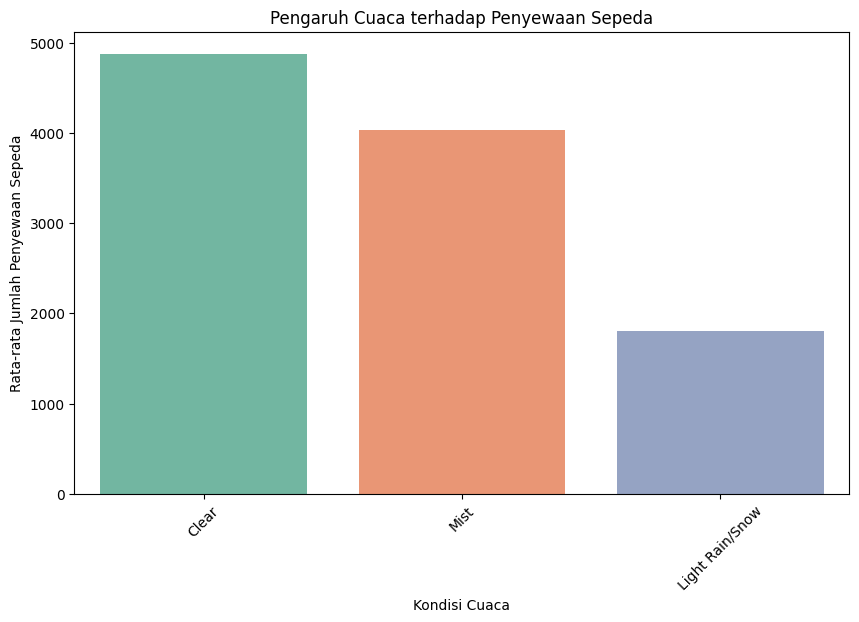

In [112]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=weather_group, estimator='mean', ci=None, palette='Set2')
plt.title('Pengaruh Cuaca terhadap Penyewaan Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Bedasarkan visualisai data yang ada, cuaca cerah merupakan cuaca dengan penyewaan sepeda terbanyak. Hal ini mungkin terjadi karena cuaca cerah adalah momen yang dirasa cocok untuk melakukan penyewaan sepeda

### Pertanyaan 2: Bagaimana pola penggunaan sepeda berubah berdasarkan hari dalam seminggu?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9268\934516407.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weekday', y='cnt', data=weekday_group, estimator='mean', ci=None, palette='Set1')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9268\934516407.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='cnt', data=weekday_group, estimator='mean', ci=None, palette='Set1')


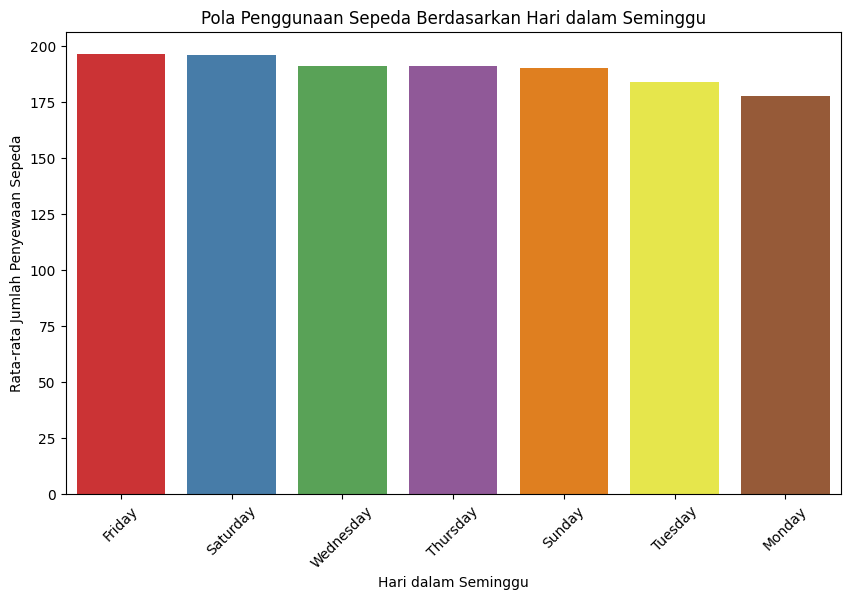

In [113]:
# 2. Visualisasi Pola Penggunaan Sepeda Berdasarkan Hari dalam Seminggu
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='cnt', data=weekday_group, estimator='mean', ci=None, palette='Set1')
plt.title('Pola Penggunaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Bedasarkan visualisai data yang ada, Hari Jum'at merupakan hari dengan rata-rata penyewaan sepeda terbanyak
- Penyewaan sepeda cenderung stabil tiap harinya

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9268\3038554129.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hr', y='cnt', data=hour_group, estimator='mean', ci=None, palette='Set1')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9268\3038554129.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='hr', y='cnt', data=hour_group, estimator='mean', ci=None, palette='Set1')


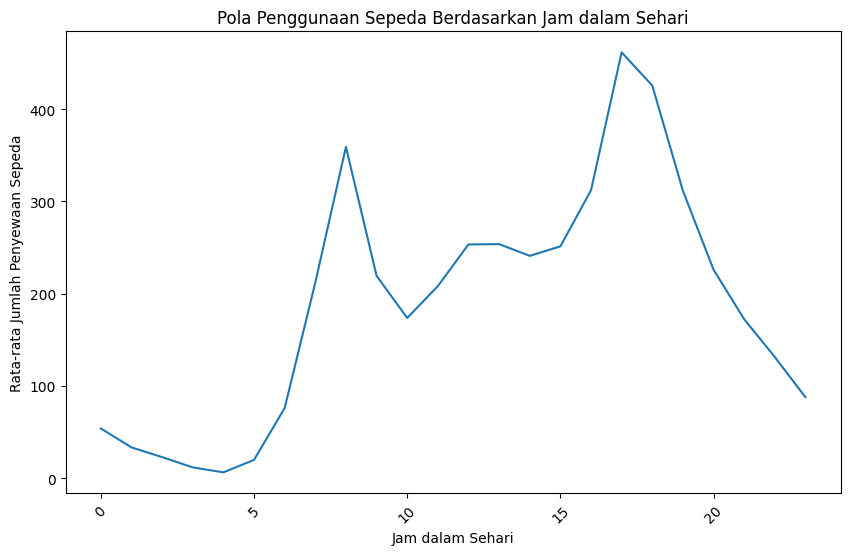

In [114]:
# 2. Visualisasi Pola Penggunaan Sepeda Berdasarkan Jam dalam Sehari
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', data=hour_group, estimator='mean', ci=None, palette='Set1')
plt.title('Pola Penggunaan Sepeda Berdasarkan Jam dalam Sehari')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Bedasarkan visualisai data yang ada, Puncak penyewaan pada pagi hari terjadi pada jam 8 dan ketika sore hari pada jam 5-6 sore. Pada jam-jam tersebut biasanya orang-orang berangkat dan pulang kerja / sekolah

## Conclusion

- Cuaca cerah merupakan cuaca dengan penyewaan sepeda tertinggi. Ketika cuaca mulai berawan hingga hujan rintik-rintik, penyewaan sepeda mengalami perubahan pola, bahkan ketika cuaca hujan deras tidak terlihat adanya transaksi penyewaan sepeda. Hal ini menunjukkan cuaca merupakan faktor yang menjadi pertimbangan dalam melakukan penyewaan sepeda
- Berdasarkan grafik yang ditampilkan, bisa disimpulkan bahwa penggunaan sepeda relatif stabil sepanjang minggu. Tidak ada hari yang menunjukkan penurunan atau lonjakan signifikan dalam jumlah penyewaan sepeda, meskipun hari Jumat sedikit lebih tinggi daripada hari-hari lainnya. Secara keseluruhan, pola penggunaan sepeda di seluruh hari dalam seminggu cukup seragam, dengan sedikit variasi antara hari-hari tertentu.
- Berdasarkan grafik yang ada, puncak penyewaan sepeda terjadi pada jam 8 pagi dan 5-6 sore yang mana pada jam-jam tersebut orang-orang berpergian untuk bekerja atau sekolah. Pada siang hari penyewaan sepeda tidak terlalu mengalami fluktuasi yang terlalu signifikan. Untuk malam hingga dini hari, penyewaan sepeda cenderung menurun

# Menyimpan seluruh data

In [117]:
# Simpan ke CSV
final_df.to_csv("final_data.csv")